Dataset path exists: True
Test image path exists: True
Total images found: 7967
Using 10 images from the dataset for processing.
Subset prepared with 10 images.
Best match found: LFW_dataset_unzipped\Biljana_Plavsic\Biljana_Plavsic_0002.jpg with distance 12093.304965971874


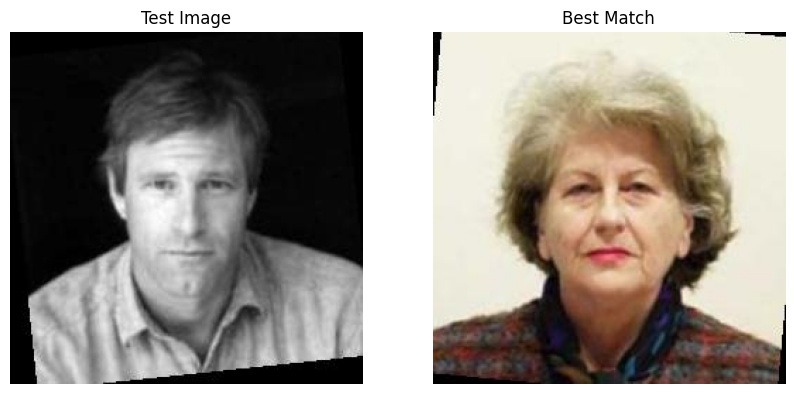

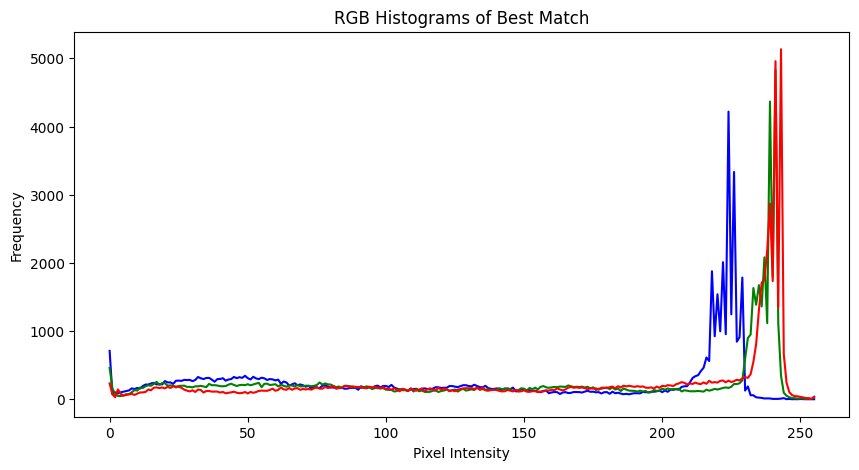

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

# Function to preprocess the dataset and create a subset
def prepare_subset(dataset_path, subset_size=10):
    dataset_faces = []
    image_paths = []
    all_files = []

    # Collect all image paths
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                all_files.append(os.path.join(root, file))

    # Debugging: Check if files are being loaded
    print(f"Total images found: {len(all_files)}")

    # Randomly select a subset of images
    subset_files = random.sample(all_files, min(subset_size, len(all_files)))
    print(f"Using {len(subset_files)} images from the dataset for processing.")

    for file_path in subset_files:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            # Resize the image for consistency
            resized_image = cv2.resize(image, (100, 100))
            dataset_faces.append(resized_image.flatten())
            image_paths.append(file_path)
        else:
            print(f"Skipping corrupted or unreadable file: {file_path}")

    return np.array(dataset_faces), image_paths

# Function to calculate and display RGB histograms
def calculate_histogram(image):
    histograms = []
    for i, color in enumerate(['blue', 'green', 'red']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        histograms.append(hist)
    return histograms

# Function to perform facial recognition on a subset
def recognize_faces(subset_faces, test_image_path, subset_image_paths):
    # Read and preprocess the test image
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    if test_image is None:
        print("Test image not found or corrupted.")
        return

    test_image_resized = cv2.resize(test_image, (100, 100)).flatten()

    # Compare the test image to the subset
    min_distance = float('inf')
    best_match_index = -1

    for i, face in enumerate(subset_faces):
        distance = np.linalg.norm(test_image_resized - face)
        if distance < min_distance:
            min_distance = distance
            best_match_index = i

    if best_match_index == -1:
        print("No valid match found.")
        return

    # Display the best matching image and its RGB histogram
    best_match_image_path = subset_image_paths[best_match_index]
    best_match_image = cv2.imread(best_match_image_path)

    print(f"Best match found: {best_match_image_path} with distance {min_distance}")

    # Display images
    plt.figure(figsize=(10, 5))

    # Test Image
    plt.subplot(1, 2, 1)
    plt.title("Test Image")
    plt.imshow(test_image, cmap='gray')
    plt.axis('off')

    # Best Match Image
    plt.subplot(1, 2, 2)
    plt.title("Best Match")
    plt.imshow(cv2.cvtColor(best_match_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    # Calculate and display RGB histograms for best match
    histograms = calculate_histogram(best_match_image)
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(['blue', 'green', 'red']):
        plt.plot(histograms[i], color=color)
    plt.title("RGB Histograms of Best Match")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Path to dataset and test image
dataset_path = "LFW_dataset_unzipped"  # Path to the dataset folder
test_image_path = "LFW_dataset_unzipped/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"  # Replace with a valid image path

# Debugging: Check dataset and test image paths
print(f"Dataset path exists: {os.path.exists(dataset_path)}")
print(f"Test image path exists: {os.path.exists(test_image_path)}")

# Prepare subset
subset_faces, subset_image_paths = prepare_subset(dataset_path, subset_size=10)
print(f"Subset prepared with {len(subset_faces)} images.")

# Perform recognition
recognize_faces(subset_faces, test_image_path, subset_image_paths)


Dataset path exists: True
Test image path exists: True
Total images found: 7967
Using 10 images from the dataset for processing.
Subset prepared with 10 images.
Recognition Time: 0.0024 seconds
Best match found: LFW_dataset_unzipped\Bridget_Fonda\Bridget_Fonda_0002.jpg
Similarity (Euclidean Distance): 11624.89


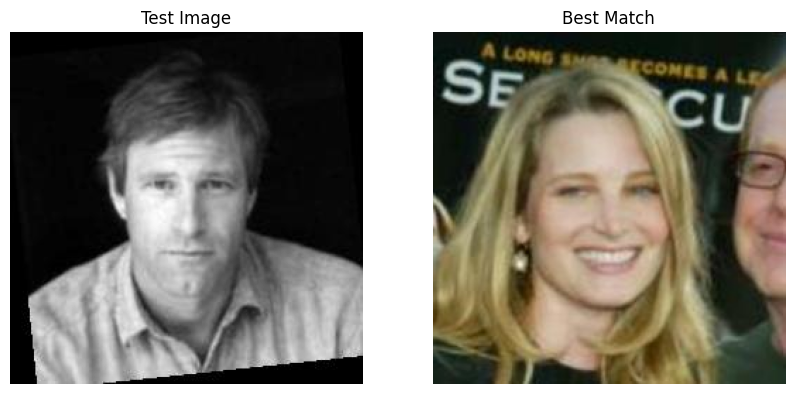

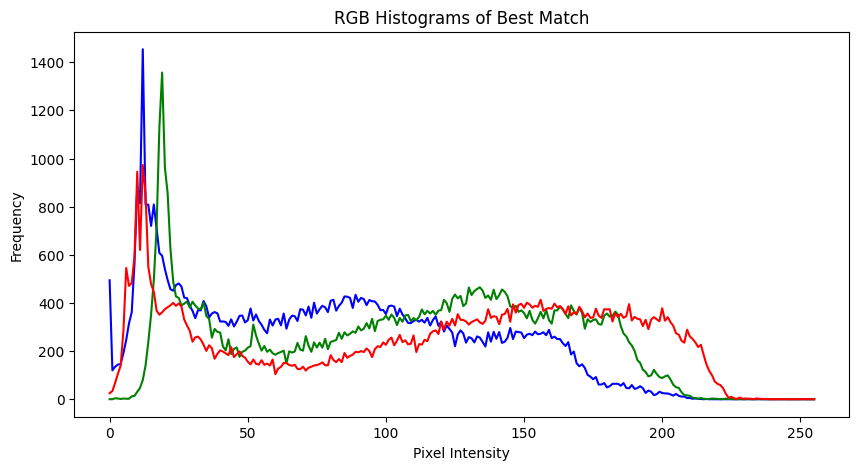

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Function to preprocess the dataset and create a subset
def prepare_subset(dataset_path, subset_size=10):
    dataset_faces = []
    image_paths = []
    all_files = []

    # Collect all image paths
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                all_files.append(os.path.join(root, file))

    # Debugging: Check if files are being loaded
    print(f"Total images found: {len(all_files)}")

    # Randomly select a subset of images
    subset_files = random.sample(all_files, min(subset_size, len(all_files)))
    print(f"Using {len(subset_files)} images from the dataset for processing.")

    for file_path in subset_files:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            # Resize the image for consistency
            resized_image = cv2.resize(image, (100, 100))
            dataset_faces.append(resized_image.flatten())
            image_paths.append(file_path)
        else:
            print(f"Skipping corrupted or unreadable file: {file_path}")

    return np.array(dataset_faces), image_paths

# Function to calculate metrics like Euclidean distance and recognition confidence
def calculate_metrics(test_image_vector, subset_faces):
    distances = np.linalg.norm(subset_faces - test_image_vector, axis=1)
    min_distance = np.min(distances)
    best_match_index = np.argmin(distances)
    return min_distance, best_match_index

# Function to calculate and display RGB histograms
def calculate_histogram(image):
    histograms = []
    for i, color in enumerate(['blue', 'green', 'red']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        histograms.append(hist)
    return histograms

# Function to perform facial recognition and show metrics
def recognize_faces(subset_faces, test_image_path, subset_image_paths):
    # Read and preprocess the test image
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    if test_image is None:
        print("Test image not found or corrupted.")
        return

    test_image_resized = cv2.resize(test_image, (100, 100)).flatten()

    # Measure time for recognition
    start_time = time.time()

    # Compute metrics
    min_distance, best_match_index = calculate_metrics(test_image_resized, subset_faces)

    elapsed_time = time.time() - start_time
    print(f"Recognition Time: {elapsed_time:.4f} seconds")

    if best_match_index == -1:
        print("No valid match found.")
        return

    # Display the best matching image and metrics
    best_match_image_path = subset_image_paths[best_match_index]
    best_match_image = cv2.imread(best_match_image_path)

    print(f"Best match found: {best_match_image_path}")
    print(f"Similarity (Euclidean Distance): {min_distance:.2f}")

    # Display images
    plt.figure(figsize=(10, 5))

    # Test Image
    plt.subplot(1, 2, 1)
    plt.title("Test Image")
    plt.imshow(test_image, cmap='gray')
    plt.axis('off')

    # Best Match Image
    plt.subplot(1, 2, 2)
    plt.title("Best Match")
    plt.imshow(cv2.cvtColor(best_match_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    # Calculate and display RGB histograms for best match
    histograms = calculate_histogram(best_match_image)
    plt.figure(figsize=(10, 5))
    for i, color in enumerate(['blue', 'green', 'red']):
        plt.plot(histograms[i], color=color)
    plt.title("RGB Histograms of Best Match")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.show()

# Path to dataset and test image
dataset_path = "LFW_dataset_unzipped"  # Path to the dataset folder
test_image_path = "LFW_dataset_unzipped/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"  # Replace with a valid image path

# Debugging: Check dataset and test image paths
print(f"Dataset path exists: {os.path.exists(dataset_path)}")
print(f"Test image path exists: {os.path.exists(test_image_path)}")

# Prepare subset
subset_faces, subset_image_paths = prepare_subset(dataset_path, subset_size=10)
print(f"Subset prepared with {len(subset_faces)} images.")

# Perform recognition
recognize_faces(subset_faces, test_image_path, subset_image_paths)


Dataset path exists: True
Test image path exists: True
Total images found: 7967
Using 10 images from the dataset for processing.
Subset prepared with 10 images.
Recognition Time: 1733789773.4545 seconds
Rank 1: LFW_dataset_unzipped\Donald_Rumsfeld\Donald_Rumsfeld_0114.jpg (Distance: 12969.65, Confidence: 35.15%)


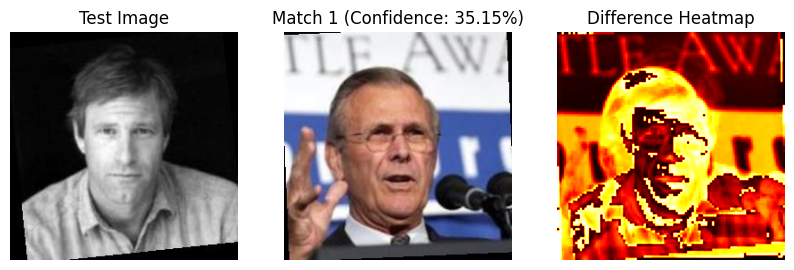

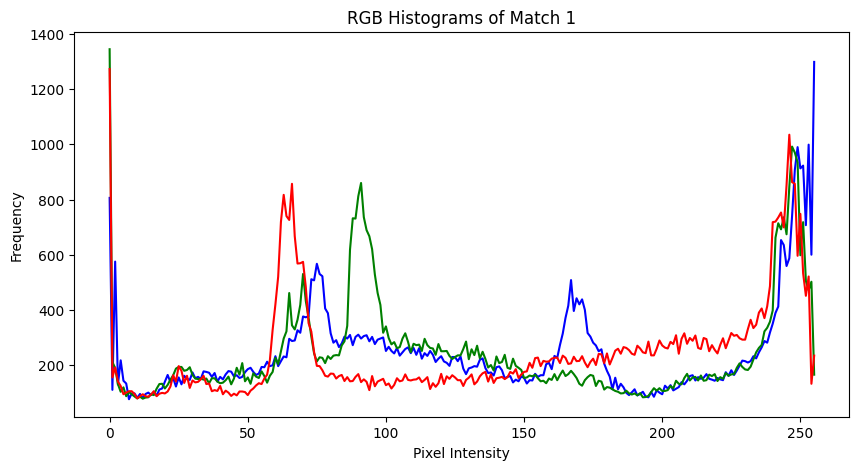

Rank 2: LFW_dataset_unzipped\Gerhard_Schroeder\Gerhard_Schroeder_0083.jpg (Distance: 13111.88, Confidence: 34.44%)


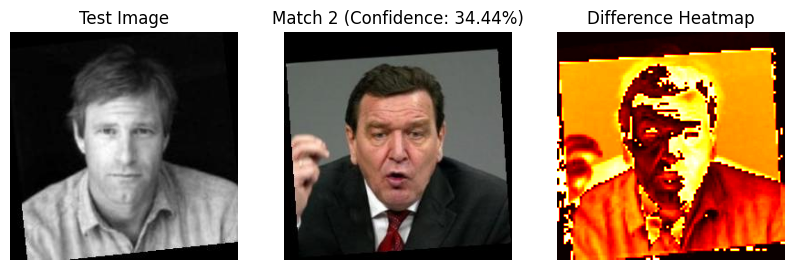

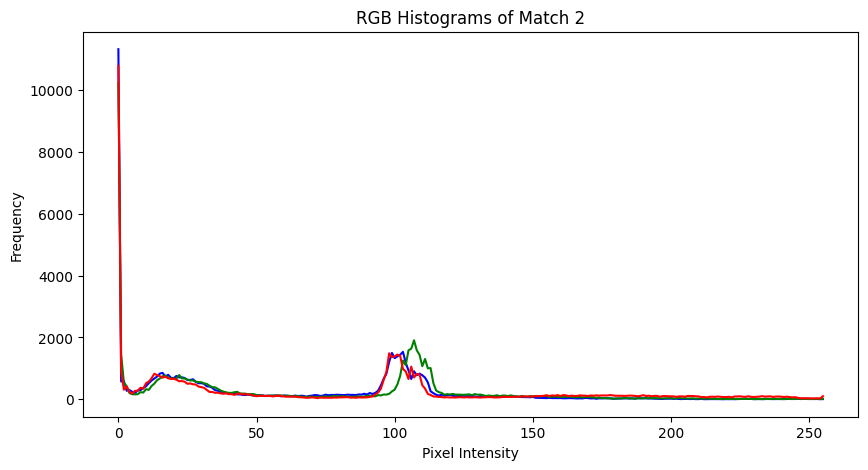

Rank 3: LFW_dataset_unzipped\Fidel_Castro\Fidel_Castro_0003.jpg (Distance: 13770.23, Confidence: 31.15%)


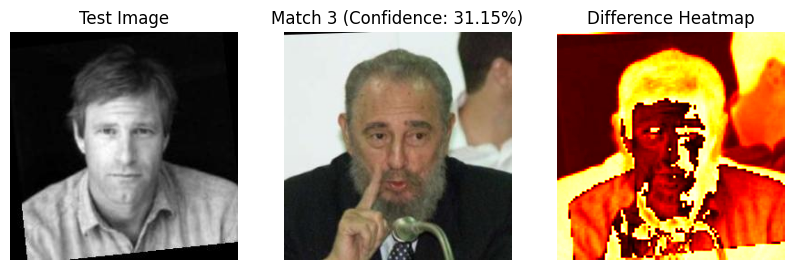

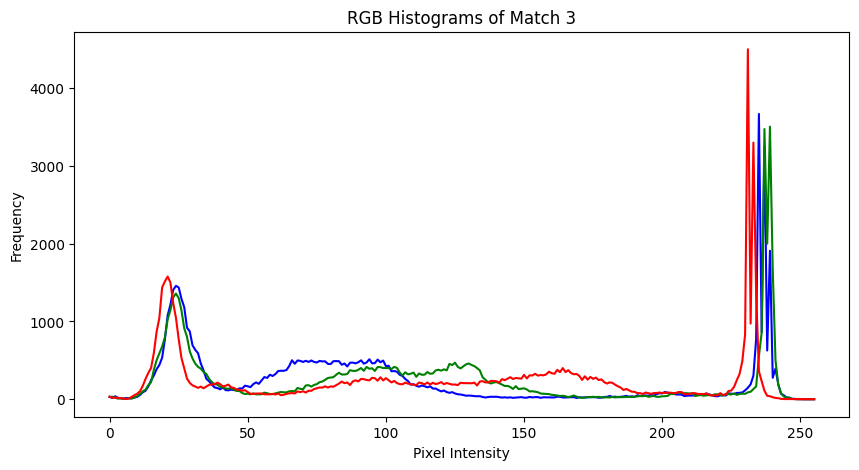

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
import time

# Function to preprocess the dataset and create a subset
def prepare_subset(dataset_path, subset_size=10):
    dataset_faces = []
    image_paths = []
    all_files = []

    # Collect all image paths
    for root, dirs, files in os.walk(dataset_path):
        for file in files:
            if file.endswith(('.png', '.jpg', '.jpeg')):
                all_files.append(os.path.join(root, file))

    print(f"Total images found: {len(all_files)}")

    # Randomly select a subset of images
    subset_files = random.sample(all_files, min(subset_size, len(all_files)))
    print(f"Using {len(subset_files)} images from the dataset for processing.")

    for file_path in subset_files:
        image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:
            resized_image = cv2.resize(image, (100, 100))
            dataset_faces.append(resized_image.flatten())
            image_paths.append(file_path)
        else:
            print(f"Skipping corrupted or unreadable file: {file_path}")

    return np.array(dataset_faces), image_paths

# Function to calculate confidence score from distance
def calculate_confidence(distance, max_distance=20000):
    confidence = max(0, 100 - (distance / max_distance * 100))
    return round(confidence, 2)

# Function to calculate and display RGB histograms
def calculate_histogram(image):
    histograms = []
    for i, color in enumerate(['blue', 'green', 'red']):
        hist = cv2.calcHist([image], [i], None, [256], [0, 256])
        histograms.append(hist)
    return histograms

# Extended facial recognition with Top-N matches and heatmap
def recognize_faces_extended(subset_faces, test_image_path, subset_image_paths, top_n=3):
    # Read and preprocess the test image
    test_image = cv2.imread(test_image_path, cv2.IMREAD_GRAYSCALE)
    if test_image is None:
        print("Test image not found or corrupted.")
        return

    test_image_resized = cv2.resize(test_image, (100, 100)).flatten()

    # Compare the test image to the subset
    distances = [np.linalg.norm(test_image_resized - face) for face in subset_faces]
    sorted_indices = np.argsort(distances)[:top_n]

    print(f"Recognition Time: {time.time():.4f} seconds")

    # Display the top N matches
    for rank, idx in enumerate(sorted_indices, start=1):
        best_match_image_path = subset_image_paths[idx]
        best_match_image = cv2.imread(best_match_image_path)
        confidence = calculate_confidence(distances[idx])

        print(f"Rank {rank}: {best_match_image_path} (Distance: {distances[idx]:.2f}, Confidence: {confidence}%)")

        plt.figure(figsize=(10, 5))

        # Test Image
        plt.subplot(1, 3, 1)
        plt.title("Test Image")
        plt.imshow(test_image, cmap='gray')
        plt.axis('off')

        # Best Match Image
        plt.subplot(1, 3, 2)
        plt.title(f"Match {rank} (Confidence: {confidence}%)")
        plt.imshow(cv2.cvtColor(best_match_image, cv2.COLOR_BGR2RGB))
        plt.axis('off')

        # Heatmap of pixel-wise difference
        diff_image = np.abs(cv2.resize(test_image, (100, 100)) - cv2.cvtColor(cv2.resize(best_match_image, (100, 100)), cv2.COLOR_BGR2GRAY))
        plt.subplot(1, 3, 3)
        plt.title("Difference Heatmap")
        plt.imshow(diff_image, cmap='hot')
        plt.axis('off')

        plt.show()

        # Calculate and display RGB histograms for best match
        histograms = calculate_histogram(best_match_image)
        plt.figure(figsize=(10, 5))
        for i, color in enumerate(['blue', 'green', 'red']):
            plt.plot(histograms[i], color=color)
        plt.title(f"RGB Histograms of Match {rank}")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.show()

# Path to dataset and test image
dataset_path = "LFW_dataset_unzipped"
test_image_path = "LFW_dataset_unzipped/Aaron_Eckhart/Aaron_Eckhart_0001.jpg"

# Debugging: Check dataset and test image paths
print(f"Dataset path exists: {os.path.exists(dataset_path)}")
print(f"Test image path exists: {os.path.exists(test_image_path)}")

# Prepare subset
subset_faces, subset_image_paths = prepare_subset(dataset_path, subset_size=10)
print(f"Subset prepared with {len(subset_faces)} images.")

# Perform extended recognition
recognize_faces_extended(subset_faces, test_image_path, subset_image_paths, top_n=3)
